In [51]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor as rfr

In [17]:
path_train = './New_train_data.csv'
train = pd.read_csv(path_train)

In [18]:
train

,DateTime,X1,X2,X3,X4,Y
0,2021/12/31 23:00,2.186333,13.76,0.0663,0.1547,5.211638e+05
1,2022/01/01 0:00,12.087667,84.86,0.4914,0.7410,2.494531e+06
2,2022/01/01 1:00,10.903667,87.28,0.4719,0.8775,2.117415e+06
3,2022/01/01 2:00,10.145333,88.58,0.4862,1.0231,1.873545e+06
4,2022/01/01 3:00,9.870000,86.06,0.4381,1.1336,1.766122e+06
...,...,...,...,...,...,...
6985,2022/10/19 0:00,35.403333,105.24,0.6188,0.8281,2.454735e+06
6986,2022/10/19 1:00,34.956667,105.42,0.4901,0.9243,2.323497e+06
6987,2022/10/19 2:00,34.866667,105.70,0.6019,0.8957,2.241004e+06
6988,2022/10/19 3:00,35.326667,105.88,0.6591,0.9802,2.206828e+06


In [19]:
train.describe()

,X1,X2,X3,X4,Y
count,6990.000000,6990.000000,6990.000000,6990.000000,6.990000e+03
mean,39.112738,75.158078,1568.280922,637.443307,3.025360e+06
std,11.889252,19.197632,2153.392780,976.013185,7.261254e+05
min,2.186333,8.812000,0.066300,0.154700,5.211638e+05
25%,29.760000,62.940500,0.535600,0.980525,2.406700e+06
50%,39.815000,77.178000,162.314750,132.882750,3.033380e+06
75%,47.918333,91.520000,2888.047500,921.700000,3.532762e+06
max,79.543333,106.540000,7380.100000,6783.400000,4.921420e+06


### Data Prepartion

In [20]:
# parsing to datetime
train.DateTime = pd.to_datetime(train.DateTime)

In [21]:
train.dtypes

DateTime    datetime64[ns]
X1                 float64
X2                 float64
X3                 float64
X4                 float64
Y                  float64
dtype: object

In [22]:
train.set_index(train['DateTime'],inplace=True)

In [23]:
# DateTime changed into the index
train_idx = train[['X1', 'X2', 'X3', 'X4', 'Y']]

### Splitting Train and Test

In [24]:
actual_arr = np.array(train_idx['Y'])
train_idx = train_idx.drop('Y', axis=1)
train_idx_arr = np.array(train_idx)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(train_idx_arr, actual_arr, test_size = 0.25, random_state = 0)

In [32]:
print('X_train Shape:', X_train.shape)
print('y_train Shape:', y_train.shape)
print('X_test Shape:', X_test.shape)
print('y_test Shape:', y_test.shape)

X_train Shape: (5242, 4)
y_train Shape: (5242,)
X_test Shape: (1748, 4)
y_test Shape: (1748,)


### Random Forest

In [58]:
rf = rfr(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

In [59]:
rf_pred = rf.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
r2 = r2_score(y_test, rf_pred)

print('Mean Squared Error:', rf_mse, 'degrees.')
print('Root Mean Squared Error:', np.sqrt(rf_mse))
print('R-squared:', r2)

Mean Squared Error: 326682412727.0612 degrees.
Root Mean Squared Error: 571561.381416783
R-squared: 0.3836882981647899


The MSE is quite high and the R-squared value is lower than 0.4 that it implies that there's low correlation.

In [60]:
rf.feature_importances_

array([0.36835296, 0.20412902, 0.22192708, 0.20559094])

<BarContainer object of 4 artists>

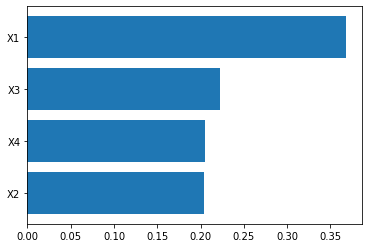

In [61]:
order = rf.feature_importances_.argsort()
plt.barh(train_idx.columns[order], rf.feature_importances_[order])

### Only with the two most important inputs

In [70]:
Xs = list(train_idx.columns)

rf_better = rfr(n_estimators = 500, random_state = 0)
impt = [Xs.index('X1'), Xs.index('X3')]
train_important = X_train[:, impt]
test_important = X_test[:, impt]

In [71]:
rf_better.fit(train_important, y_train)

RandomForestRegressor(n_estimators=500, random_state=0)

In [72]:
pred_better = rf_better.predict(test_important)

rf_mse = mean_squared_error(y_test, pred_better)
r2 = r2_score(y_test, pred_better)

print('Mean Squared Error:', rf_mse, 'degrees.')
print('Root Mean Squared Error:', np.sqrt(rf_mse))
print('R-squared:', r2)

Mean Squared Error: 428797012378.1905 degrees.
Root Mean Squared Error: 654825.9405202199
R-squared: 0.19104118818464677


### Use CV to find the best parameters

In [ ]:
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

rf_random.fit(train_features, train_labels)